This notebook was prepared by Cayetano Benavent, 2016.

# Pandas 02

In [72]:
import pandas as pd

## Reading data

In [73]:
data = "../../data/undata_emisspcap.csv"

World CO<sub>2</sub> emissions data.

Data source: United Nations, 2016.

Reading a CSV (comma separated values) file:

In [74]:
df = pd.read_csv(data)

In [75]:
type(df)

pandas.core.frame.DataFrame

## Exploring data

Read and print only first rows with ```head``` (it is a big file with thousands of rows):

In [76]:
df.head()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,Value,Value Footnotes
0,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2011,2011,0.425262,NaN
1,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2010,2010,0.302936,NaN
2,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2009,2009,0.249074,NaN
3,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2008,2008,0.158962,NaN
4,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2007,2007,0.088141,NaN


Print only last rows with ```tail``` :

In [77]:
df.tail()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,Value,Value Footnotes
10566,EN.ATM.CO2E.PC,ZWE,Zimbabwe,YR1968,1968,1.309827,NaN
10567,EN.ATM.CO2E.PC,ZWE,Zimbabwe,YR1967,1967,1.122961,NaN
10568,EN.ATM.CO2E.PC,ZWE,Zimbabwe,YR1966,1966,1.323656,NaN
10569,EN.ATM.CO2E.PC,ZWE,Zimbabwe,YR1965,1965,1.179176,NaN
10570,EN.ATM.CO2E.PC,ZWE,Zimbabwe,YR1964,1964,1.045374,NaN


Counting rows:

In [78]:
df.count()

Indicator Code          10571
Country or Area Code    10571
Country or Area         10571
Time Code               10571
Year                    10571
Value                   10571
Value Footnotes             0
dtype: int64

In [79]:
df.keys()

Index(['Indicator Code', 'Country or Area Code', 'Country or Area',
       'Time Code', 'Year', 'Value', 'Value Footnotes'],
      dtype='object')

Generating various summary statistics, excluding NaN values:

In [80]:
df.describe()

,Year,Value,Value Footnotes
count,10571.000000,10571.000000,0
mean,1986.746949,4.311682,NaN
std,15.053139,7.193311,NaN
min,1960.000000,0.000580,NaN
25%,1974.000000,0.411164,NaN
50%,1988.000000,1.590776,NaN
75%,2000.000000,5.977060,NaN
max,2011.000000,99.840439,NaN


In [81]:
df.describe?

## Accessing data

In [82]:
df['Value'].head()

0    0.425262
1    0.302936
2    0.249074
3    0.158962
4    0.088141
Name: Value, dtype: float64

In [83]:
df['Value'].isnull().value_counts()

False    10571
Name: Value, dtype: int64

In [84]:
df['Year'].isnull().value_counts()

False    10571
Name: Year, dtype: int64

In [85]:
df['Value Footnotes'].isnull().value_counts()

True    10571
Name: Value Footnotes, dtype: int64

In [86]:
df['Value'][0]

0.42526210494041705

Rename columns:

In [87]:
df.rename(columns={'Value': 'emissions'}, inplace=True)

In [88]:
df.head()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,emissions,Value Footnotes
0,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2011,2011,0.425262,NaN
1,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2010,2010,0.302936,NaN
2,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2009,2009,0.249074,NaN
3,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2008,2008,0.158962,NaN
4,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2007,2007,0.088141,NaN


Accessing data by attribute (China emissions):

In [89]:
chn = df[df['Country or Area Code'] == 'CHN']

In [90]:
chn.head()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,emissions,Value Footnotes
1855,EN.ATM.CO2E.PC,CHN,China,YR2011,2011,6.710302,NaN
1856,EN.ATM.CO2E.PC,CHN,China,YR2010,2010,6.172489,NaN
1857,EN.ATM.CO2E.PC,CHN,China,YR2009,2009,5.778143,NaN
1858,EN.ATM.CO2E.PC,CHN,China,YR2008,2008,5.311152,NaN
1859,EN.ATM.CO2E.PC,CHN,China,YR2007,2007,5.153564,NaN


In [91]:
x_ch = chn['Year']
y_ch = chn['emissions']

In [92]:
x_ch.head()

1855    2011
1856    2010
1857    2009
1858    2008
1859    2007
Name: Year, dtype: int64

In [93]:
x_ch.tail()

1902    1964
1903    1963
1904    1962
1905    1961
1906    1960
Name: Year, dtype: int64

In [94]:
y_ch.head()

1855    6.710302
1856    6.172489
1857    5.778143
1858    5.311152
1859    5.153564
Name: emissions, dtype: float64

In [95]:
y_ch.tail()

1902    0.625646
1903    0.640002
1904    0.661428
1905    0.836047
1906    1.170381
Name: emissions, dtype: float64

## Pandas and Matplotlib

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

(1960, 2011)

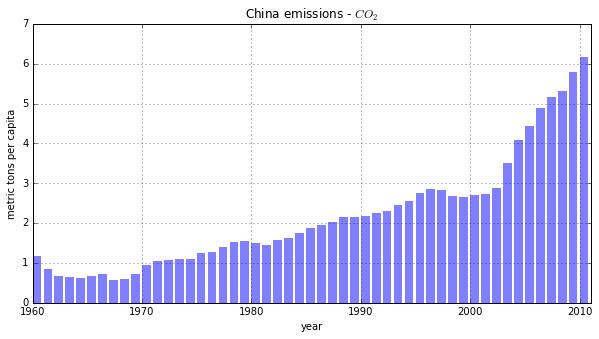

In [97]:
plt.figure(figsize=(10,5))
plt.bar(x_ch,y_ch, alpha=0.5, linewidth=0)
plt.grid(True)
plt.title("China emissions - $CO_2$")
plt.xlabel("year")
plt.ylabel("metric tons per capita")
plt.xlim([x_ch.min(), x_ch.max()])

In [98]:
esp = df[df['Country or Area Code'] == 'ESP']

In [99]:
x_es = esp['Year']
y_es = esp['emissions']

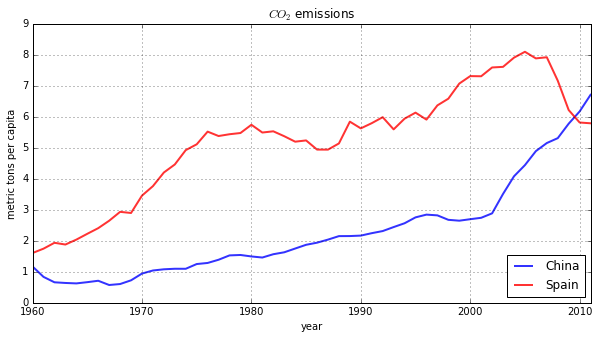

In [100]:
plt.figure(figsize=(10,5))
plt.plot(x_ch,y_ch, alpha=0.8, linewidth=2, label="China")
plt.plot(x_es,y_es, alpha=0.8, linewidth=2, color='red', label="Spain")
plt.grid(True)
plt.title("$CO_2$ emissions")
plt.xlabel("year")
plt.ylabel("metric tons per capita")
plt.xlim([x_ch.min(), x_ch.max()])
plt.legend(loc=4, )

## More data wrangling

In [101]:
df[df.Year == df.Year.max()].head()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,emissions,Value Footnotes
0,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2011,2011,0.425262,NaN
52,EN.ATM.CO2E.PC,ALB,Albania,YR2011,2011,1.607038,NaN
104,EN.ATM.CO2E.PC,DZA,Algeria,YR2011,2011,3.316038,NaN
156,EN.ATM.CO2E.PC,ADO,Andorra,YR2011,2011,5.968685,NaN
173,EN.ATM.CO2E.PC,AGO,Angola,YR2011,2011,1.354008,NaN


In [102]:
esp[esp['Year'] >= 2000][['Year', 'emissions', 'Time Code', 'Country or Area']]

,Year,emissions,Time Code,Country or Area
8745,2011,5.790764,YR2011,Spain
8746,2010,5.815787,YR2010,Spain
8747,2009,6.216973,YR2009,Spain
8748,2008,7.165452,YR2008,Spain
8749,2007,7.920891,YR2007,Spain
8750,2006,7.884196,YR2006,Spain
8751,2005,8.097058,YR2005,Spain
8752,2004,7.908051,YR2004,Spain
8753,2003,7.611166,YR2003,Spain
8754,2002,7.591281,YR2002,Spain


In [103]:
esp[(esp['Year'] >= 1970) & (esp['emissions'] > 7.5) ][['Year', 'emissions']]

,Year,emissions
8749,2007,7.920891
8750,2006,7.884196
8751,2005,8.097058
8752,2004,7.908051
8753,2003,7.611166
8754,2002,7.591281


Pivot tables:

In [104]:
df.head()

,Indicator Code,Country or Area Code,Country or Area,Time Code,Year,emissions,Value Footnotes
0,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2011,2011,0.425262,NaN
1,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2010,2010,0.302936,NaN
2,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2009,2009,0.249074,NaN
3,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2008,2008,0.158962,NaN
4,EN.ATM.CO2E.PC,AFG,Afghanistan,YR2007,2007,0.088141,NaN


In [105]:
wld = df.pivot(index='Country or Area',columns='Year', values='emissions')

In [106]:
wld.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country or Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.046068,0.053615,0.073781,0.074251,0.086317,0.101499,0.107674,0.123782,0.115547,0.086863,...,0.041641,0.046108,0.040727,0.054855,0.065816,0.088141,0.158962,0.249074,0.302936,0.425262
Albania,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,...,1.229541,1.412697,1.376213,1.412498,1.291548,1.507536,1.580113,1.533178,1.515632,1.607038
Algeria,0.553764,0.531810,0.484954,0.452824,0.459569,0.522449,0.649481,0.632118,0.659263,0.797206,...,2.840028,2.856410,2.727017,3.220155,2.990267,3.189978,3.205183,3.428472,3.309912,3.316038
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.484095,7.159140,7.208829,7.088128,6.553477,6.350868,6.296125,6.049173,6.124770,5.968685
Angola,0.104357,0.084718,0.216025,0.206877,0.216174,0.206089,0.265164,0.166659,0.275655,0.451126,...,0.786223,0.543084,1.086605,1.069417,1.200877,1.311096,1.369425,1.430873,1.401654,1.354008


Transpose data:

In [107]:
wld.T.head()

Country or Area,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.046068,1.258195,0.553764,NaN,0.104357,0.670617,0.643964,2.367473,NaN,NaN,...,1.701583,NaN,NaN,7.005107,0.215631,NaN,3.096144,0.703403,NaN,NaN
1961,0.053615,1.374186,0.531810,NaN,0.084718,0.860441,0.685501,2.442616,NaN,NaN,...,1.602723,NaN,NaN,6.136886,0.225435,NaN,3.067062,0.507631,NaN,NaN
1962,0.073781,1.439956,0.484954,NaN,0.216025,1.823374,0.761148,2.522392,NaN,NaN,...,1.540657,NaN,0.594888,6.155057,0.258760,NaN,3.138020,0.728004,NaN,NaN
1963,0.074251,1.181681,0.452824,NaN,0.206877,1.470175,0.875124,2.316356,NaN,NaN,...,1.639285,NaN,0.471728,6.155748,0.247579,NaN,3.242364,0.537606,NaN,NaN
1964,0.086317,1.111742,0.459569,NaN,0.216174,1.567094,0.999248,2.538380,NaN,NaN,...,1.710101,NaN,0.864247,5.973226,0.314058,NaN,3.358696,0.658012,0.950434,1.045374


## Exporting data

Exporting data to CSV file:

In [108]:
wld.to_csv("../../data/world_emissions.csv")

Exporting data to excel file (XLSX):

In [109]:
writer = pd.ExcelWriter("../../data/co2_emissions.xlsx")

In [110]:
esp.to_excel(writer, sheet_name='Spain')
chn.to_excel(writer, sheet_name='China')

In [111]:
writer.save()